<a href="https://colab.research.google.com/github/2000siddharth/web_scraping_classification/blob/master/EDA_YT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing import libraries
import re
import pandas as pd
import numpy as np
import sqlite3
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as tsne
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
pip install MulticoreTSNE

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp36-cp36m-linux_x86_64.whl size=68502 sha256=00fcfb836e0d9da0b74ce0be8a011b371113b87a38d41206b04960b8a0c184d1
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


In [0]:
df = pd.read_csv('combined_youtube4.csv')

In [7]:
df.head()

,video_id,title,description,category
0,https://www.youtube.com/watch?v=J8XJjkA5NuQ,"Dr. A. P. J. Abdul Kalam, Lecture Series, Tech...","Techfest, IIT Bombay presents Dr. A. P. J. Abd...",tutorial
1,https://www.youtube.com/watch?v=C31hcftHBIk,Lecture Laa Ke | Nachhatar Gill | Full Video S...,Angel Records Presents New Punjabi Song Lectur...,tutorial
2,https://www.youtube.com/watch?v=Xn7KWR9EOGQ,Basics of Stock Market For Beginners Lecture 1...,You can get my lectures from my new website ht...,tutorial
3,https://www.youtube.com/watch?v=FPaByTt1Yws,"Musique classique pour la lecture de Mozart, C...","Musique classique pour la lecture de Mozart, C...",tutorial
4,https://www.youtube.com/watch?v=ViyG77Bca4I,2020 PTE - RETELL LECTURE (PART-1) | 27TH JANU...,This practice session covers the PTE: Retell l...,tutorial


In [0]:
category = df['category']

In [12]:
df.shape

(10275, 4)

In [0]:
category

0        tutorial
1        tutorial
2        tutorial
3        tutorial
4        tutorial
           ...   
10270        food
10271        food
10272        food
10273        food
10274        food
Name: category, Length: 10275, dtype: object

In [0]:
def cleaner(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", 'can not', phrase)
  
  # general
    phrase = re.sub(r"n\'t"," not", phrase)
    phrase = re.sub(r"\'re'"," are", phrase)
    phrase = re.sub(r"\'s"," is", phrase)
    phrase = re.sub(r"\'ll"," will", phrase)
    phrase = re.sub(r"\'d"," would", phrase)
    phrase = re.sub(r"\'t"," not", phrase)
    phrase = re.sub(r"\'ve"," have", phrase)
    phrase = re.sub(r"\'m"," am", phrase)
    
    return phrase

In [0]:
from bs4 import BeautifulSoup
from tqdm import tqdm
import re
from nltk.corpus import stopwords

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
stop = set(stopwords.words('english'))
len(stop)

179

In [17]:
cleaned_title = []

for sentance in tqdm(df['title'].values):
    sentance = str(sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = cleaner(sentance)
    sentance = re.sub(r'[?|!|\'|"|#|+]', r'', sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop)
    cleaned_title.append(sentance.strip())

100%|██████████| 10275/10275 [00:02<00:00, 3466.21it/s]


In [18]:
cleaned_description = []

for sentance in tqdm(df['description'].values):
    sentance = str(sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = cleaner(sentance)
    sentance = re.sub(r'[?|!|\'|"|#|+]', r'', sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop)
    cleaned_description.append(sentance.strip())

 32%|███▏      | 3290/10275 [00:01<00:02, 3286.75it/s]/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
100%|██████████| 10275/10275 [00:03<00:00, 3257.17it/s]


In [19]:
df['title'] = cleaned_title

df['description'] = cleaned_description
df.head()

,video_id,title,description,category
0,https://www.youtube.com/watch?v=J8XJjkA5NuQ,dr p j abdul kalam lecture series iit bombay,techfest iit bombay presents dr p j abdul kala...,tutorial
1,https://www.youtube.com/watch?v=C31hcftHBIk,lecture laa ke nachhatar gill full video song ...,angel records presents new punjabi song lectur...,tutorial
2,https://www.youtube.com/watch?v=Xn7KWR9EOGQ,basics stock market beginners lecture ca racha...,get lectures new website opportunity learn con...,tutorial
3,https://www.youtube.com/watch?v=FPaByTt1Yws,musique classique pour la lecture de mozart ch...,musique classique pour la lecture de mozart ch...,tutorial
4,https://www.youtube.com/watch?v=ViyG77Bca4I,pte retell lecture january february predicted ...,practice session covers pte retell lecture rea...,tutorial


In [0]:
# FOR BAG OF WORDS
Count=CountVectorizer()

In [15]:
df[df['category'] == "art"]['title']

5522                        tried fluid art mop fluid art
5523    daily challenge easy art power lines sunset pa...
5524                       simple yet brilliant art ideas
5525    creative painting talented people diy art idea...
5526    hired professional artist create cursed pokemo...
                              ...                        
9702               muskegon free bookstore turns february
9703    hindu girl abducted wedding forcibly converted...
9704    thank bill balleza highlighting bill love wood...
9705     camp livin support families lost members suicide
9706                                         ajmer khwaja
Name: title, Length: 1048, dtype: object

In [0]:
Vec_data=Count.fit_transform(df['description'])

In [23]:
Vec_data.shape

(10275, 19391)

In [0]:
#converting the sparce matrix to a regular matrix of arrays
Vec_data=Vec_data.toarray()

In [26]:
type(Vec_data)

numpy.ndarray

In [0]:
Standard_Data= StandardScaler().fit_transform(Vec_data)

In [0]:
tsne1 = tsne(n_jobs=-1,n_iter=1000,n_components=2,perplexity=30,random_state=0)

In [0]:
Tsne_desc = tsne1.fit_transform(Standard_Data)

In [0]:
#Tsne_title=np.vstack((Tsne_title.T,category)).T
Tsne_Data=np.vstack((Tsne_desc.T,category)).T

In [0]:
Tsne_Data.shape

In [0]:
Tsne_Data

In [0]:
Final_df=pd.DataFrame(data=Tsne_Data,columns=('Feature1','Feature2','categories'))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


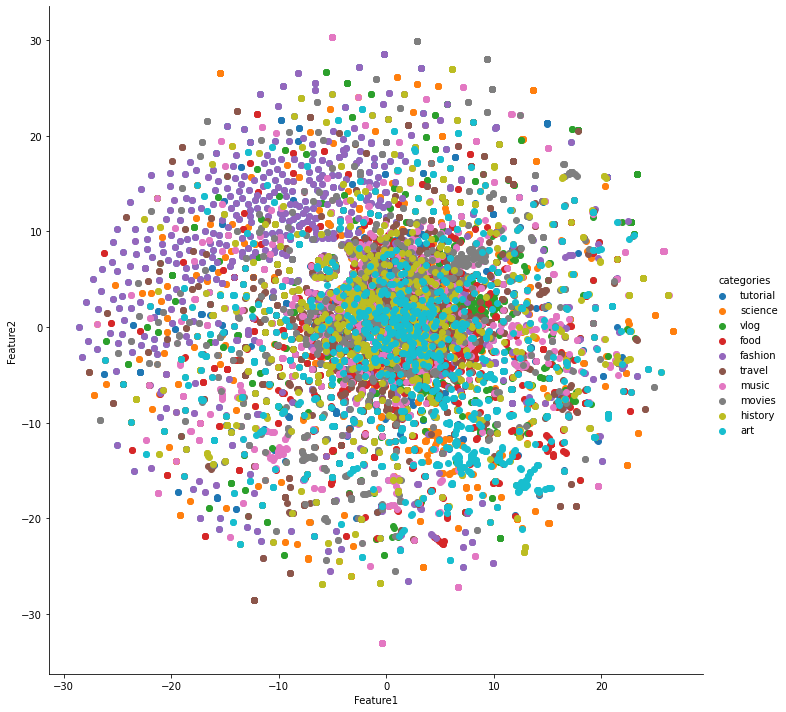

In [37]:
sns.FacetGrid(Final_df,hue='categories',size=10).map(plt.scatter,'Feature1','Feature2').add_legend()
plt.show()

In [0]:
categories = df['category'].unique()

N-Gram BOW

In [0]:
count_vector=CountVectorizer(ngram_range=(1,2))

In [0]:
N_gram_vector=count_vector.fit_transform(df['description'])

In [0]:
N_gram_vector=N_gram_vector.toarray()

N_gram_vector_std=StandardScaler().fit_transform(N_gram_vector)

In [0]:
tsne_n=tsne(n_jobs=-1,n_components=2,n_iter=1000,random_state=0,perplexity=30)

In [0]:
N_gram_vector_tsne=tsne_n.fit_transform(N_gram_vector_std)

In [0]:
category = df['category']
N_gram_vector_final=np.vstack((N_gram_vector_tsne.T,score)).T

In [0]:
Final_df=pd.DataFrame(data=N_gram_vector_final,columns=('Feature1','Feature2','categories'))

In [0]:
N_gram_vector_final.head(5)

In [0]:
sns.FacetGrid(N_gram_vector_final,hue='categories',size=8).map(plt.scatter,'Feature 1','Feature 2').add_legend()
plt.show()

In [0]:
df1 = pd.DataFrame(data=Tsne_title,columns=('Feature1','Feature2'))
df2 = pd.DataFrame(data=Tsne_desc, columns=('Feature1', 'Feature2'))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


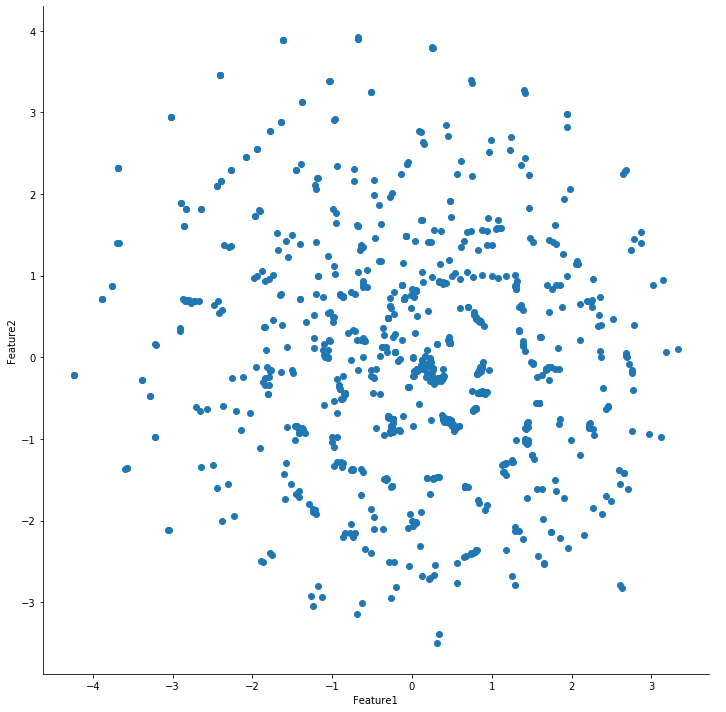

In [0]:
sns.FacetGrid(df1 ,size=10).map(plt.scatter,'Feature1','Feature2').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


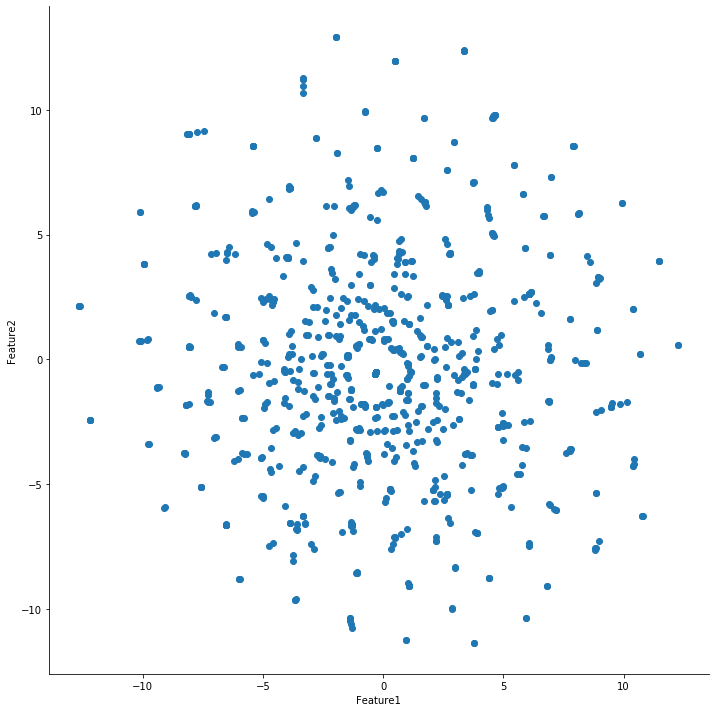

In [0]:
sns.FacetGrid(df2 ,size=10).map(plt.scatter,'Feature1','Feature2').add_legend()
plt.show()

In [0]:
fashion_desc = Count.transform(df[df['category'] == "science"]['description'])
fashion_title = Count.transform(df[df['category'] == "science"]['title'])

In [0]:
Fashion_desc=fashion_desc.toarray()
Fashion_title=fashion_title.toarray()

In [0]:
Standard_fashiondesc=StandardScaler().fit_transform(Fashion_desc)
Standard_fashiontitle = StandardScaler().fit_transform(Fashion_title)

In [0]:
tsne1 = tsne(n_jobs=-1,n_iter=1000,n_components=2,perplexity=30,random_state=0)

In [0]:
Tsnefashion_desc = tsne1.fit_transform(Standard_fashiondesc)
Tsnefashion_title = tsne1.fit_transform(Standard_fashiontitle)

In [0]:
df1 = pd.DataFrame(data=Tsnefashion_title,columns=('Feature1','Feature2'))
df2 = pd.DataFrame(data=Tsnefashion_desc, columns=('Feature1', 'Feature2'))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


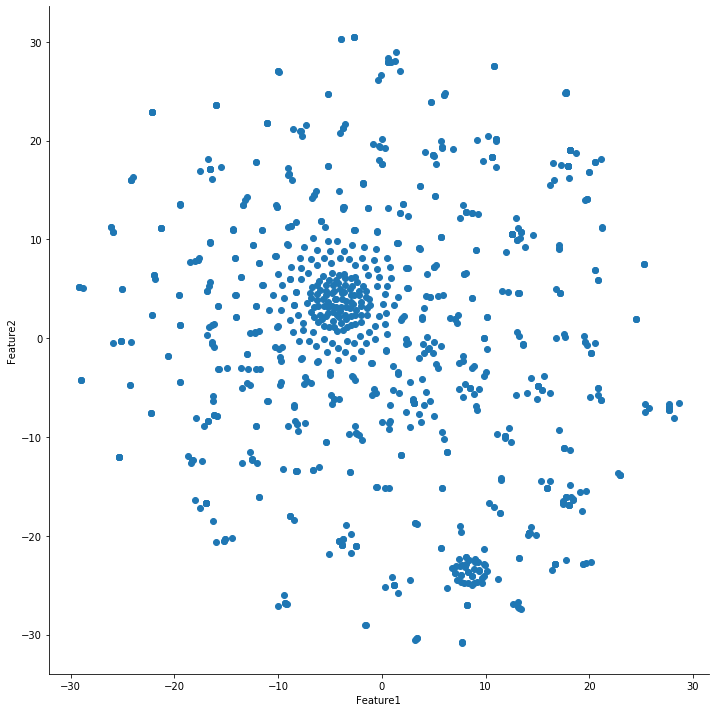

In [0]:
sns.FacetGrid(df1 ,size=10).map(plt.scatter,'Feature1','Feature2').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


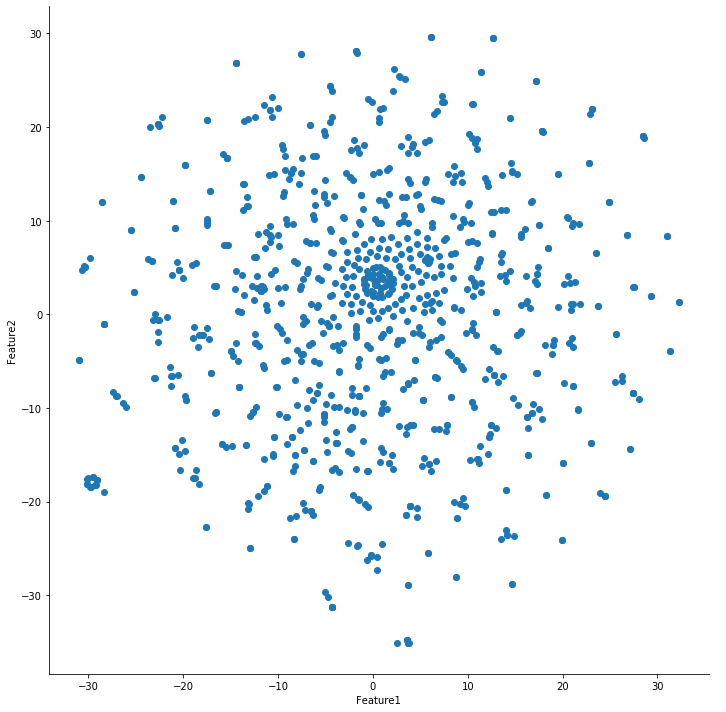

In [0]:
sns.FacetGrid(df2 ,size=10).map(plt.scatter,'Feature1','Feature2').add_legend()
plt.show()

In [0]:
i=0
list_of_sent=[]
for sent in df['description']:
    list_of_sent.append(sent.split())

In [0]:
w2v_model=Word2Vec(list_of_sent,min_count=3,size=50, workers=4)

In [0]:
words=list(w2v_model.wv.vocab)

In [0]:
len(words)

5933

In [0]:
w2v_model.wv.most_similar('tutorial')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('create', 0.9998121857643127),
 ('people', 0.9997962713241577),
 ('beautiful', 0.9997754693031311),
 ('great', 0.9997732043266296),
 ('back', 0.999762237071991),
 ('part', 0.9997406005859375),
 ('information', 0.9997391104698181),
 ('different', 0.9997367262840271),
 ('group', 0.9997292757034302),
 ('shows', 0.9997282028198242)]

In [0]:
words[:100]

['iit',
 'bombay',
 'presents',
 'dr',
 'p',
 'j',
 'distinguished',
 'lecture',
 'series',
 'listen',
 'scientist',
 'speak',
 'angel',
 'records',
 'new',
 'punjabi',
 'song',
 'ke',
 'nachhatar',
 'gill',
 'law',
 'singer',
 'get',
 'lectures',
 'website',
 'opportunity',
 'learn',
 'concepts',
 'relating',
 'musique',
 'classique',
 'pour',
 'la',
 'de',
 'mozart',
 'chopin',
 'practice',
 'session',
 'covers',
 'pte',
 'retell',
 'real',
 'exam',
 'questions',
 'high',
 'probability',
 'repeated',
 'register',
 'course',
 'visit',
 'part',
 'one',
 'side',
 'indian',
 'geography',
 'notes',
 'discuss',
 'statistics',
 'mean',
 'also',
 'exercise',
 'third',
 'live',
 'class',
 'join',
 'us',
 'video',
 'based',
 'true',
 'lives',
 'students',
 'describes',
 'go',
 'latest',
 'student',
 'features',
 'first',
 'second',
 'term',
 'year',
 'introductory',
 'linear',
 'algebra',
 'leading',
 'powered',
 'media',
 'cast',
 'raviteja',
 'sai',
 'investor',
 'entrepreneur',
 'peter',
 '

In [0]:
from sklearn.decomposition import PCA

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

labels = LabelEncoder()
df['categoryid'] = labels.fit_transform(df['category'])

X = df['title']
y = df['categoryid']

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
#    print("TRAIN:", train_index, "TEST:", test_index)
    X_Train, X_test = X[train_index], X[test_index]
    y_Train, y_test = y[train_index], y[test_index] 

from sklearn.model_selection import train_test_split
X_train, X_cross, y_train, y_cross = train_test_split(X_Train, y_Train, random_state=0, stratify=y_Train, test_size=0.1)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
count_vect.fit(X_train)
X_train_counts = count_vect.transform(X_train).toarray()
X_cross_counts = count_vect.transform(X_cross).toarray()
X_test_counts = count_vect.transform(X_test).toarray()

In [0]:
features = np.concatenate((X_train_counts,X_test_counts), axis=0)
labels = np.concatenate((y_train,y_test), axis=0)

In [0]:
labels

array([8, 8, 3, ..., 9, 6, 0])

In [0]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = category
        
    

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    
                    alpha=.7).set_title(title);

In [0]:
category = df['category'].unique()

In [0]:
category

array(['tutorial', 'science', 'vlog', 'food', 'fashion', 'travel',
       'music', 'movies', 'history', 'art'], dtype=object)

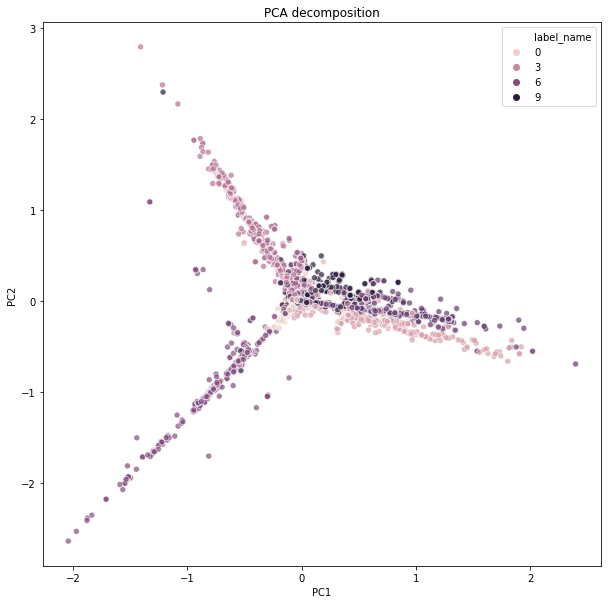

In [0]:
plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)